In [58]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [59]:
from proj1_helpers import *
from data_helpers import *
from implementations import ridge_regression

In [60]:
DATA_TRAIN_PATH = 'data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [67]:
#DATA PREPROCESSING : we try to limit the number of undefined values appearing in the datas 
 
    
columns_bad_correl = [30, 29, 28, 27, 25, 24, 7, 6]
#vérigier pas trop corr avec des bonnes features predictives
correl_ = np.delete(tX, columns_bad_correl, axis=1)

#vire les colonnes avec trop de undefined values
bounds = [0.2, 0.5]
tX_after, indices = treat_undefined_values(bounds, correl_)

print(correl_.shape)
print(tX_after.shape)
print(indices)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  


(250000, 23)
(250000, 19)
[4, 5, 10, 22]


In [68]:
#MODEL BUILDING
tx, mean, std = standardize(tX_after,0)
y, tx = build_model_data(tx,y)

In [69]:
num_samples = len(y)
num_features = tx.shape[1]

num_samples, num_features

(250000, 20)

## Ridge regression using normal equations:

### Linear regression

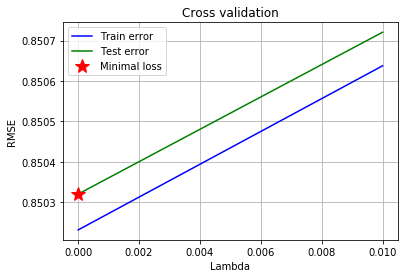

 Best value of lambda = 6.866488450043588e-13 
 Loss = 0.8503204462053058 
 Weights = [-0.31466146  0.09824137 -0.30061404 -0.07495308 -0.18540292 -0.03174591
 -0.0373482  -0.11828401  0.14574701  0.18109463 -0.00055528 -0.00234169
  0.21678777 -0.0008045   0.00203775  0.18239603  0.0010438  -0.08514064
  0.03652646  0.01581   ]


In [70]:
from cross_validation import cross_validation
from cost import compute_loss_rmse
from plots import *

w_initial = np.random.rand(num_features)
lambdas = np.logspace(-500, -2, 50)
k_fold = 4
seed = 6

# prepare storage of the mean of the weights and rmse for train and test data
ws = np.zeros((num_features, len(lambdas)))
rmse_train = []
rmse_test = []

for ind, lambda_ in enumerate(lambdas):
    # prepare storage of weights and rmse for train and test data for each fold
    ws_tmp = np.zeros((num_features, k_fold))
    rmse_tr = []
    rmse_te = []
    # cross-validation
    for i,k in enumerate(range(k_fold)):
        tx_train, y_train, tx_test, y_test = cross_validation(y, tx, k, k_fold, seed)
        w,_ = ridge_regression(y_train, tx_train, lambda_)
        # store weights and rmse for train and test data for each fold
        ws_tmp[:, i] = w
        rmse_tr.append(compute_loss_rmse(y_train, tx_train, w))
        rmse_te.append(compute_loss_rmse(y_test, tx_test, w))
    # store the mean of the weights and rmse for train and test data
    ws[:, ind] = np.mean(ws_tmp, 1)
    rmse_train.append(np.mean(rmse_tr))
    rmse_test.append(np.mean(rmse_te))
    
loss = np.amin(rmse_test)
weights = ws[:, np.argmin(rmse_test)]
lambda_star = lambdas[np.argmin(rmse_test)]


plot_cross_validation(lambdas, "Lambda", lambda_star, rmse_train, rmse_test, loss)
print(" Best value of lambda = {g} \n Loss = {l} \n Weights = {we}".format(
    g=lambda_star, l=loss, we = weights))

### Polynomial regression

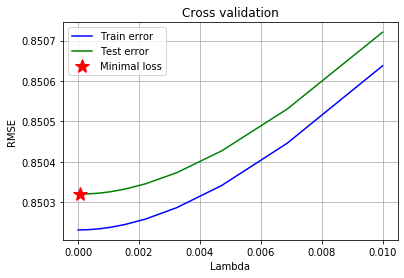

Degree=1 Best value of lambda = 5.179474679231202e-05 
 Loss = 0.8503204233417874 
 Weights = [-0.31462886  0.09821315 -0.30045646 -0.07486461 -0.18502232 -0.03175541
 -0.03728521 -0.11824882  0.1456988   0.18099734 -0.00055571 -0.00234229
  0.21656229 -0.00080444  0.00203802  0.18214682  0.00104457 -0.08513403
  0.03647365  0.01577852]


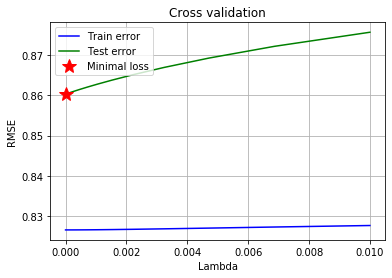

Degree=2 Best value of lambda = 1e-10 
 Loss = 0.8603063387826131 
 Weights = [-0.01430655 -0.06281034 -0.30504543  0.03080011 -0.07227029 -0.01230105
  0.07937937 -0.11708505  0.07422241  0.15965622 -0.00054276 -0.00128552
  0.12639924  0.00107102  0.00081895  0.12889581  0.00077355 -0.06963536
  0.38528779 -0.33805865 -0.01430661 -0.07567613  0.03300278 -0.01170809
 -0.00240247  0.00338398  0.00497337  0.0140562   0.15430825 -0.00990898
 -0.04088181 -0.00255578 -0.00988925 -0.0739987  -0.00176072 -0.00339434
 -0.00168967 -0.02104269 -0.2295769  -0.01117691]


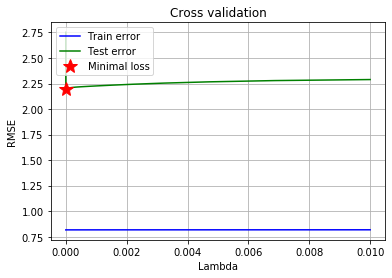

Degree=3 Best value of lambda = 1.6768329368110066e-05 
 Loss = 2.1955904569469027 
 Weights = [-2.48421568e-01  5.72669909e-01 -2.89751801e-01  4.10835438e-02
 -1.22196282e-02 -3.19885470e-02  1.22432253e-01 -1.36582971e-01
 -3.19642836e-02  1.38268775e-01 -4.19213161e-03 -3.16016597e-03
  7.84565134e-02  3.00977592e-03  3.77488908e-03  6.11876343e-02
  1.09480313e-03 -5.73149940e-02 -4.67433569e-02  4.34142683e-01
 -2.48421568e-01 -2.48421568e-01 -1.54815322e-02 -1.13880115e-01
  6.72561214e-02 -3.20691938e-03 -4.39351541e-02  1.87833185e-03
  3.55227240e-03  2.24726498e-03  1.12855080e-02 -2.61597329e-04
 -1.43624614e-02  7.22554736e-04  3.47268549e-02 -1.65678307e-03
  1.31468162e-01  6.98505367e-02 -2.16084906e-02  5.41024793e-04
 -3.71342303e-02  1.55996088e-03 -2.10257609e-03  1.08778003e-03
 -1.54812129e-02  7.63023246e-04 -7.06425190e-02 -9.94293046e-04
 -1.49548573e-03 -1.81809071e-03 -1.97496786e-04 -3.81774221e-04
 -1.64085487e-03 -4.88943855e-04 -4.59696533e-02  4.71199442

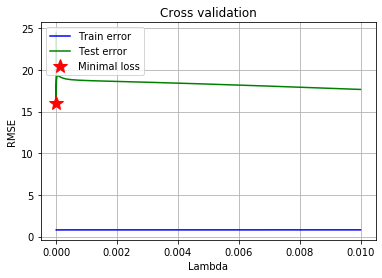

Degree=4 Best value of lambda = 2.6826957952797275e-07 
 Loss = 15.979412730378469 
 Weights = [-1.16830901e+00  3.91906510e+00 -2.79464296e-01 -3.59995634e-03
 -1.97256946e-02 -3.38698121e-02 -1.23180400e-02 -1.06508450e-01
 -3.78952583e-02  1.90834953e-01 -4.23811234e-03 -1.10715419e-03
  7.00548757e-02  4.43199324e-03  4.04357823e-03  4.49557589e-02
  1.45649350e-03 -6.06953761e-02 -1.70521861e+00  7.36142352e+00
 -1.16830954e+00 -1.16830956e+00 -1.16830964e+00 -2.53484669e+00
 -7.18941304e-01  4.93637298e-01  5.20732076e-02  8.92959666e-04
 -2.18387583e-04 -7.08993621e-02  9.12181677e-03 -2.41347418e-04
  1.52450102e-02  1.29679727e-03 -2.41420674e-04  1.85174023e-02
 -1.23278440e-03  1.79429689e-05  1.46936360e-02 -1.34650200e-03
  1.41785285e-06  5.54959271e-02 -6.68218708e-03  1.98161826e-04
  3.42655796e-02  6.21898533e-02  4.67485114e-02 -5.28522289e-02
  4.05251548e-03 -7.55271077e-05 -2.85003825e-02  1.14701181e-03
 -1.21086370e-03 -9.10481292e-03  2.51706525e-04  2.78231433

In [ ]:
from cross_validation import cross_validation
from cost import compute_loss_rmse

w_initial = np.random.rand(num_features)
degrees = 8
lambdas = np.logspace(-10, -2, 50)
k_fold = 4
seed = 6

Lambdas_star = []
Loss = []

for indices, degree in enumerate(range(1, degrees+1)):
    
    # prepare storage of the mean of the weights and rmse for train and test data
    ws = np.zeros((num_features*degree, len(lambdas)))
    rmse_train = []
    rmse_test = []

    for ind, lambda_ in enumerate(lambdas):
        # prepare storage of weights and rmse for train and test data for each fold
        ws_tmp = np.zeros((num_features*degree, k_fold))
        rmse_tr = []
        rmse_te = []
        # cross-validation
        for i,k in enumerate(range(k_fold)):
            tx_tr, y_train, tx_te, y_test = cross_validation(y, tx, k, k_fold, seed)
            #form data with polynomial degree
            tx_train = build_poly_all_features(tx_tr, degree)
            tx_test = build_poly_all_features(tx_te, degree)
            #ridge regression
            w,_ = ridge_regression(y_train, tx_train, lambda_)
            # store weights and rmse for train and test data for each fold
            ws_tmp[:, i] = w
            rmse_tr.append(compute_loss_rmse(y_train, tx_train, w))
            rmse_te.append(compute_loss_rmse(y_test, tx_test, w))
        # store the mean of the weights and rmse for train and test data
        ws[:, ind] = np.mean(ws_tmp, 1)
        rmse_train.append(np.mean(rmse_tr))
        rmse_test.append(np.mean(rmse_te))

        
    loss = np.amin(rmse_test)
    #weights = ws[:, np.argmin(rmse_test)]
    lambda_star = lambdas[np.argmin(rmse_test)]

    #plot_cross_validation(lambdas, "Lambda", lambda_star, rmse_train, rmse_test, loss)
    #print("Degree={d} Best value of lambda = {g} \n Loss = {l} \n Weights = {we}".format(
       # d=degree, g=lambda_star, l=loss)) #, we = weights))
    print("Degree={d}".format(d=degree))
    
    Lambdas_star.append(lambda_star)
    Loss.append(loss)

degree_star =  degrees[np.argmin(Loss)]      
Loss_star = np.amin(Loss)
Lambda_star = Lambdas_star[np.argmin(Loss)]

TX_train = build_poly_all_features(tx, degree_star)
Weights_star,_ = ridge_regression(y, tx, Lambda_star)
print("Best degree={d} Best value of lambda = {g} \n Loss = {l} \n Weights = {we}".format(
        d=degree_star, g=Lambda_star, l=Loss_star, we = Weights_star))

## Generate predictions and save ouput in csv format for submission:

In [27]:
DATA_TEST_PATH = 'data/test.csv'
ytest, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
tX_test = np.delete(tX_test, indices, axis=1)
_, tx_test = build_model_data(tX_test,ytest)

In [28]:
OUTPUT_PATH = 'data/submission_ridge.csv'
y_pred = predict_labels(weights, tx_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)